In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from bmtool.singlecell import Profiler, Passive, CurrentClamp, FI, ZAP

template_dir = 'templates'
mechanism_dir = 'mechanisms'

profiler = Profiler(template_dir=template_dir, mechanism_dir=mechanism_dir, dt = 0.05)

def run_and_plot(sim, title, xlabel, ylabel, plot=True, plot_injection_only=False):
    X, Y = sim.execute()
    X = np.array(X)
    Y = np.array(Y)
    if plot:
        plt.figure()
        if plot_injection_only:
            t_idx = (X >= sim.inj_delay) & (X <= sim.inj_delay + sim.inj_dur)
            plt.plot(X[t_idx], Y[t_idx])
        else:
            plt.plot(X, Y)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    return X, Y

In [2]:
Cell = 'CP_Cell'
h.celsius = 34.

noise = False
post_init_function = 'insert_mechs(0)' if noise else None

#### Passive Properties

In [3]:
sim = Passive(Cell, inj_amp=-100., inj_delay=1500., inj_dur=1000., tstop=2500., method='exp2') #
title = 'Passive Cell Current Injection'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[0].soma[0](0.5)
Recording: CP_Cell[0].soma[0](0.5)._ref_v


Running simulation for passive properties...

V Rest: -84.40 (mV)
Resistance: 66.67 (MOhms)
Membrane time constant: 35.90 (ms)

V_rest Calculation: Voltage taken at time 1500.0 (ms) is
-84.40 (mV)

R_in Calculation: dV/dI = (v_final-v_rest)/(i_final-i_start)
(-91.07 - (-84.40)) / (-0.1 - 0)
6.67 (mV) / 0.1 (nA) = 66.67 (MOhms)

Tau Calculation: Fit a double exponential curve to the membrane potential response
f(t) = a0 + a1*exp(-t/tau1) + a2*exp(-t/tau2)
Constained by initial value: f(0) = a0 + a1 + a2 = v_rest
Fit parameters: (a0, a1, a2, tau1, tau2) = (-91.06, -8.09, 14.74, 35.90, 14.61)
Membrane time constant is determined from the slowest exponential term: 35.90 (ms)

Sag potential: v_sag = v_peak - v_final = -1.70 (mV)
Normalized sag potential: v_sag / (v_peak - v_rest) = 0.203



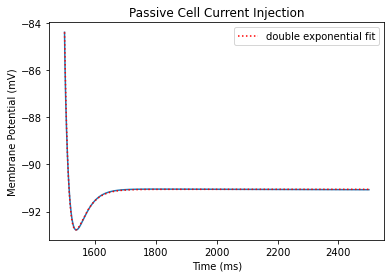

In [4]:
if sim.method == 'exp2':
    X, Y = run_and_plot(sim, title, xlabel, ylabel, plot_injection_only=True)
    plt.gca().plot(*sim.double_exponential_fit(), 'r:', label='double exponential fit')
    plt.legend()
else:
    X, Y = run_and_plot(sim, title, xlabel, ylabel, plot_injection_only=True)
plt.show()

#### Current Injection

In [5]:
sim2 = CurrentClamp(Cell, post_init_function=post_init_function,
                    inj_amp=400., inj_delay=1500., inj_dur=1000., tstop=3000.)
title = 'Current Injection'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[1].soma[0](0.5)
Recording: CP_Cell[1].soma[0](0.5)._ref_v


Current clamp simulation running...


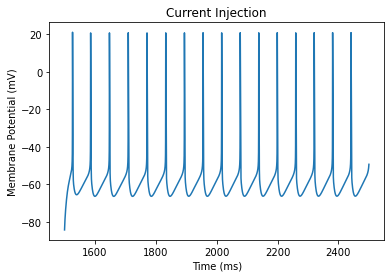

In [6]:
X, Y = run_and_plot(sim2, title, xlabel, ylabel, plot_injection_only=True)
plt.show()

#### Impedance Amplitude Profile (ZAP)

In [7]:
sim3 = ZAP(Cell, post_init_function=post_init_function,
                  inj_amp=100., inj_delay=1000., inj_dur=15000., tstop=15500.,
                  fstart=0., fend=15., chirp_type='linear')
title = 'ZAP Response'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[2].soma[0](0.5)
Recording: CP_Cell[2].soma[0](0.5)._ref_v


ZAP current simulation running...

Chirp current injection with frequency changing from 0 to 15 Hz over 15 seconds
Impedance is calculated as the ratio of FFT amplitude of membrane voltage to FFT amplitude of chirp current

Resonant Peak Frequency: 4.87 (Hz)


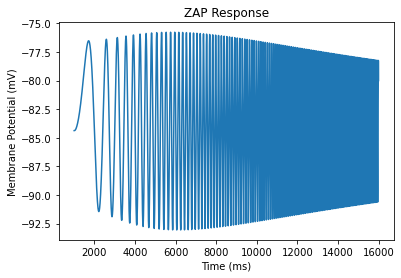

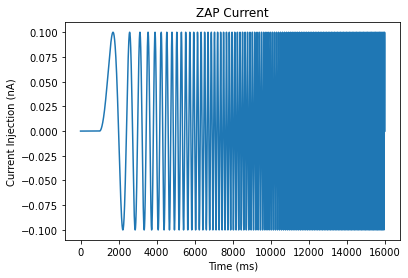

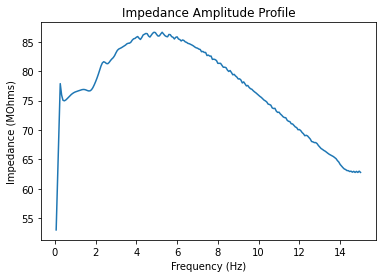

In [8]:
X, Y = run_and_plot(sim3, title, xlabel, ylabel, plot_injection_only=True)

plt.figure()
plt.plot(X, sim3.zap_vec)
plt.title('ZAP Current')
plt.xlabel('Time (ms)')
plt.ylabel('Current Injection (nA)')

plt.figure()
plt.plot(*sim3.get_impedance(smooth=9))
plt.title('Impedance Amplitude Profile')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance (MOhms)')
plt.show()

#### F-I Curve

In [9]:
sim4 = FI(Cell, post_init_function=post_init_function, i_start=0., i_stop=1000., i_increment=50., tstart=1500.)
title = 'FI Curve'
xlabel = 'Injection (nA)'
ylabel = '# Spikes'

Injection location: CP_Cell[22].soma[0](0.5)
Recording: CP_Cell[22].soma[0](0.5)._ref_v


Running simulations for FI curve...

Results
Injection (nA): 0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95
Number of spikes: 0, 0, 0, 0, 0, 0, 0, 11, 16, 21, 26, 32, 37, 43, 49, 55, 61, 69, 3, 2



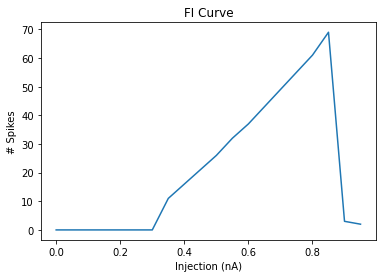

In [10]:
X, Y = run_and_plot(sim4, title, xlabel, ylabel)
plt.show()